We’ll be using the MNIST digits dataset as our sample
dataset (for convenience purposes). That said, our
make_pairs function will work with any image dataset,
provided you supply two separate image and labels
arrays (which you’ll learn how to do in the next code
block).

Import packages

In [7]:
# import the necessary packages
from tensorflow.keras.datasets import mnist # dataset easy to load
from imutils import build_montages # generate output images
import matplotlib.pyplot as plt
import numpy as np
import cv2

Function to plot images in notebook

In [8]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	plt.figure(figsize=(12, 12))
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [9]:
# two params, images and their labels
def make_pairs(images, labels):
	# initialize two empty lists to hold the (image, image) pairs and
	# labels to indicate if a pair is positive or negative
	# two tuples
	pairImages = []
	pairLabels = []

	# calculate the total number of classes present in the dataset
	# and then build a list of indexes for each class label that
	# provides the indexes for all examples with a given label
	# MNIST has 10 class labels 0 to 9
	numClasses = len(np.unique(labels))
	# loop over indexes and get current, store as an index variable
	# list of all indexes hat belong to the current class label, i.
	idx = [np.where(labels == i)[0] for i in range(0, numClasses)]

	# loop over all images
	for idxA in range(len(images)):
		# grab the current image and label belonging to the current
		# iteration
		currentImage = images[idxA]
		label = labels[idxA]


		# POSITIVE PAIR
		# randomly pick an image that belongs to the *same* class
		# label
		idxB = np.random.choice(idx[label])
		posImage = images[idxB]

		# prepare a positive pair and update the images and labels
		# lists, respectively
		pairImages.append([currentImage, posImage])
		pairLabels.append([1])

		# NEGATIVE PAIR
		# grab the indices for each of the class labels *not* equal to
		# the current label and randomly pick an image corresponding
		# to a label *not* equal to the current label
		negIdx = np.where(labels != label)[0]
		negImage = images[np.random.choice(negIdx)]

		# prepare a negative pair of images and update our lists
		pairImages.append([currentImage, negImage])
		pairLabels.append([0])

	# return a 2-tuple of our image pairs and labels
	return (np.array(pairImages), np.array(pairLabels))

In [11]:
# load MNIST dataset and scale the pixel values to the range of [0, 1]
print("[INFO] loading MNIST dataset...")
# loads the MNIST training and testing split from disk
(trainX, trainY), (testX, testY) = mnist.load_data()

# build the positive and negative image pairs
print("[INFO] preparing positive and negative pairs...")
(pairTrain, labelTrain) = make_pairs(trainX, trainY)
(pairTest, labelTest) = make_pairs(testX, testY)

# initialize the list of images that will be used when building our
# montage
images = []

[INFO] loading MNIST dataset...
[INFO] preparing positive and negative pairs...


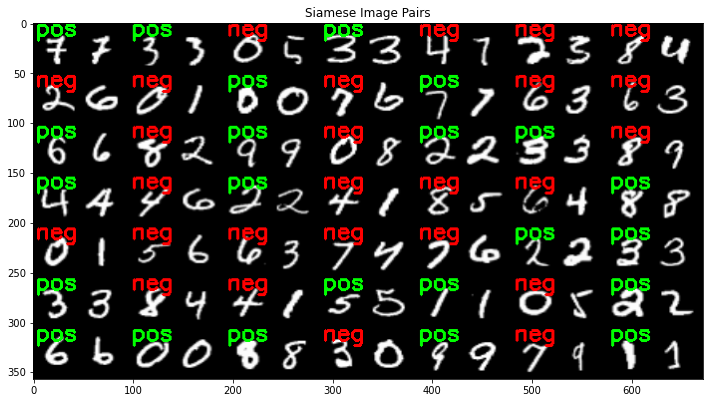

In [12]:
# loop over a sample of 49 randomly selected pairTrain images
for i in np.random.choice(np.arange(0, len(pairTrain)), size=(49,)):
	# grab the two images in the pair
	imageA = pairTrain[i][0]
	imageB = pairTrain[i][1]
	# accesses the corresponding label (1 for “same”, 0 for “different”).
	label = labelTrain[i]

	# to make it easier to visualize the pairs and their positive or
	# negative annotations, we're going to "pad" the pair with four
	# pixels along the top, bottom, and right borders, respectively
	output = np.zeros((36, 60), dtype="uint8")
	pair = np.hstack([imageA, imageB])
	output[4:32, 0:56] = pair

	# set the text label for the pair along with what color we are
	# going to draw the pair in (green for a "positive" pair and
	# red for a "negative" pair)
	text = "neg" if label[0] == 0 else "pos"
	color = (0, 0, 255) if label[0] == 0 else (0, 255, 0)

	# create a 3-channel RGB image from the grayscale pair, resize
	# it from 28x28 to 96x51 (so we can better see it), and then
	# draw what type of pair it is on the image
	vis = cv2.merge([output] * 3)
	vis = cv2.resize(vis, (96, 51), interpolation=cv2.INTER_LINEAR)
	cv2.putText(vis, text, (2, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.75,
		color, 2)

	# add the pair visualization to our list of output images
	images.append(vis)

# construct the montage for the images
montage = build_montages(images, (96, 51), (7, 7))[0]

# show the output montage
plt_imshow("Siamese Image Pairs", montage)